In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import string
from matplotlib import gridspec
import re

import time
import pickle

import memory_profiler

%load_ext memory_profiler

from pathlib import Path

In [2]:
mpl.__version__

'3.8.2'

In [3]:
import black
import jupyter_black

jupyter_black.load(line_length=79)

In [4]:
%load_ext autoreload
%autoreload 2

from pubmed_landscape_src.plotting import *

In [5]:
variables_path = Path("../../results/variables")
figures_path = Path("../../results/figures")
# figures_path = Path("../../results/figures/final")
berenslab_data_path = Path("/gpfs01/berens/data/data/pubmed_processed")

In [6]:
plt.style.use("../matplotlib_style.txt")

# Fig S8: Embedding and retracted papers colored by country 

### Import

In [7]:
tsne_reparsed = np.load(variables_path / "tsne_reparsed.npy")

In [8]:
tsne_bert = np.vstack((-tsne_reparsed[:, 0], tsne_reparsed[:, 1])).T

In [9]:
# load
countries_first_author_usa_corrected = np.load(
    variables_path / "countries_first_author_usa_corrected.npy"
)
colors_countries_first_author_usa_corrected = np.load(
    variables_path / "colors_countries_first_author_usa_corrected.npy",
    allow_pickle=True,
)

In [10]:
# legend colors
pickle_in = open(
    "../../results/variables/2024_baseline/colors_countries_legend_2024.pkl",
    "rb",
)
colors_countries_legend_2024 = pickle.load(pickle_in)

In [11]:
%%time
colors_countries_first_author_usa_corrected_with_black = np.where(
    colors_countries_first_author_usa_corrected == "lightgrey",
    "#474747",
    colors_countries_first_author_usa_corrected,
)
colors_countries_first_author_usa_corrected_with_black = np.where(
    countries_first_author_usa_corrected == "unknown",
    "lightgrey",
    colors_countries_first_author_usa_corrected_with_black,
)

CPU times: user 1.15 s, sys: 106 ms, total: 1.25 s
Wall time: 1.25 s


In [12]:
# import clean_df_updated
clean_df_updated_reparsed_filtered = pd.read_pickle(
    berenslab_data_path
    / "clean_df_updated_reparsed_filtered_with_authors_ISSN"
)

In [13]:
all_abstracts = clean_df_updated_reparsed_filtered.AbstractText

In [14]:
mask_retracted_pmids = np.load(variables_path / "mask_retracted_pmids.npy")

In [15]:
mask_new_retracted_pmids = np.load(
    variables_path / "mask_new_retracted_pmids.npy"
)

## Mentions in the abstract
We extract the papers that mention the following words ("retracted", "retraction", "withdrawal") in the abstract to exclude them from the plot. We want to highlight only retracted papers that do not explicitly state in their abstract that they have been retracted.

### Flagged in PubMed

In [16]:
abstracts = all_abstracts[mask_retracted_pmids]

In [17]:
word = "retracted"
sub1 = " " + word
sub2 = word.capitalize()
sub3 = word.upper()

indexes1 = abstracts.str.find(sub1)
indexes2 = abstracts.str.find(sub2)
indexes3 = abstracts.str.find(sub3)

mask_retracted = (indexes1 != -1) | (indexes2 != -1) | (indexes3 != -1)


print(
    f"Number of papers with uncapitalized word '{sub1}': ",
    len(np.where(indexes1 != -1)[0]),
)
print(
    f"Number of papers with capitalized word '{sub2}': ",
    len(np.where(indexes2 != -1)[0]),
)
print(
    f"Number of papers with uppercased word '{sub3}': ",
    len(np.where(indexes3 != -1)[0]),
)
print(
    f"Number of total papers with {word}: ",
    len(np.where(mask_retracted)[0]),
)

Number of papers with uncapitalized word ' retracted':  160
Number of papers with capitalized word 'Retracted':  10
Number of papers with uppercased word 'RETRACTED':  0
Number of total papers with retracted:  160


In [18]:
word = "retraction"
sub1 = " " + word
sub2 = word.capitalize()
sub3 = word.upper()

indexes1 = abstracts.str.find(sub1)
indexes2 = abstracts.str.find(sub2)
indexes3 = abstracts.str.find(sub3)

mask_retraction = (indexes1 != -1) | (indexes2 != -1) | (indexes3 != -1)


print(
    f"Number of papers with uncapitalized word '{sub1}': ",
    len(np.where(indexes1 != -1)[0]),
)
print(
    f"Number of papers with capitalized word '{sub2}': ",
    len(np.where(indexes2 != -1)[0]),
)
print(
    f"Number of papers with uppercased word '{sub3}': ",
    len(np.where(indexes3 != -1)[0]),
)
print(
    f"Number of total papers with {word}: ",
    len(np.where(mask_retraction)[0]),
)

Number of papers with uncapitalized word ' retraction':  42
Number of papers with capitalized word 'Retraction':  12
Number of papers with uppercased word 'RETRACTION':  0
Number of total papers with retraction:  46


In [19]:
word = "withdrawal"
sub1 = " " + word
sub2 = word.capitalize()
sub3 = word.upper()

indexes1 = abstracts.str.find(sub1)
indexes2 = abstracts.str.find(sub2)
indexes3 = abstracts.str.find(sub3)

mask_withdrawal = (indexes1 != -1) | (indexes2 != -1) | (indexes3 != -1)


print(
    f"Number of papers with uncapitalized word '{sub1}': ",
    len(np.where(indexes1 != -1)[0]),
)
print(
    f"Number of papers with capitalized word '{sub2}': ",
    np.sum(indexes2 != -1),
)
print(
    f"Number of papers with uppercased word '{sub3}': ",
    len(np.where(indexes3 != -1)[0]),
)
print(
    f"Number of total papers with {word}: ",
    len(np.where(mask_withdrawal)[0]),
)

Number of papers with uncapitalized word ' withdrawal':  43
Number of papers with capitalized word 'Withdrawal':  146
Number of papers with uppercased word 'WITHDRAWAL':  0
Number of total papers with withdrawal:  187


In [20]:
word = "withdrawn"
sub1 = " " + word
sub2 = word.capitalize()
sub3 = word.upper()

indexes1 = abstracts.str.find(sub1)
indexes2 = abstracts.str.find(sub2)
indexes3 = abstracts.str.find(sub3)

mask_withdrawn = (indexes1 != -1) | (indexes2 != -1) | (indexes3 != -1)


print(
    f"Number of papers with uncapitalized word '{sub1}': ",
    len(np.where(indexes1 != -1)[0]),
)
print(
    f"Number of papers with capitalized word '{sub2}': ",
    np.sum(indexes2 != -1),
)
print(
    f"Number of papers with uppercased word '{sub3}': ",
    len(np.where(indexes3 != -1)[0]),
)
print(
    f"Number of total papers with {word}: ",
    len(np.where(mask_withdrawn)[0]),
)

Number of papers with uncapitalized word ' withdrawn':  34
Number of papers with capitalized word 'Withdrawn':  0
Number of papers with uppercased word 'WITHDRAWN':  0
Number of total papers with withdrawn:  34


In [21]:
print(
    f"There are {np.sum((~mask_retraction)& (~mask_retracted)& (~mask_withdrawal)& (~mask_withdrawn))} intact papers"
)

There are 11756 intact papers


### New PMIDs from Retraction Watch

In [22]:
abstracts = all_abstracts[mask_new_retracted_pmids]

In [23]:
word = "retracted"
sub1 = " " + word
sub2 = word.capitalize()
sub3 = word.upper()

indexes1 = abstracts.str.find(sub1)
indexes2 = abstracts.str.find(sub2)
indexes3 = abstracts.str.find(sub3)

mask_retracted_new = (indexes1 != -1) | (indexes2 != -1) | (indexes3 != -1)


print(
    f"Number of papers with uncapitalized word '{sub1}': ",
    len(np.where(indexes1 != -1)[0]),
)
print(
    f"Number of papers with capitalized word '{sub2}': ",
    len(np.where(indexes2 != -1)[0]),
)
print(
    f"Number of papers with uppercased word '{sub3}': ",
    len(np.where(indexes3 != -1)[0]),
)
print(
    f"Number of total papers with {word}: ",
    len(np.where(mask_retracted_new)[0]),
)

Number of papers with uncapitalized word ' retracted':  85
Number of papers with capitalized word 'Retracted':  0
Number of papers with uppercased word 'RETRACTED':  0
Number of total papers with retracted:  85


In [24]:
word = "retraction"
sub1 = " " + word
sub2 = word.capitalize()
sub3 = word.upper()

indexes1 = abstracts.str.find(sub1)
indexes2 = abstracts.str.find(sub2)
indexes3 = abstracts.str.find(sub3)

mask_retraction_new = (indexes1 != -1) | (indexes2 != -1) | (indexes3 != -1)


print(
    f"Number of papers with uncapitalized word '{sub1}': ",
    len(np.where(indexes1 != -1)[0]),
)
print(
    f"Number of papers with capitalized word '{sub2}': ",
    len(np.where(indexes2 != -1)[0]),
)
print(
    f"Number of papers with uppercased word '{sub3}': ",
    len(np.where(indexes3 != -1)[0]),
)
print(
    f"Number of total papers with {word}: ",
    len(np.where(mask_retraction_new)[0]),
)

Number of papers with uncapitalized word ' retraction':  55
Number of papers with capitalized word 'Retraction':  16
Number of papers with uppercased word 'RETRACTION':  1
Number of total papers with retraction:  60


In [25]:
word = "withdrawal"
sub1 = " " + word
sub2 = word.capitalize()
sub3 = word.upper()

indexes1 = abstracts.str.find(sub1)
indexes2 = abstracts.str.find(sub2)
indexes3 = abstracts.str.find(sub3)

mask_withdrawal_new = (indexes1 != -1) | (indexes2 != -1) | (indexes3 != -1)


print(
    f"Number of papers with uncapitalized word '{sub1}': ",
    len(np.where(indexes1 != -1)[0]),
)
print(
    f"Number of papers with capitalized word '{sub2}': ",
    np.sum(indexes2 != -1),
)
print(
    f"Number of papers with uppercased word '{sub3}': ",
    len(np.where(indexes3 != -1)[0]),
)
print(
    f"Number of total papers with {word}: ",
    len(np.where(mask_withdrawal_new)[0]),
)

Number of papers with uncapitalized word ' withdrawal':  44
Number of papers with capitalized word 'Withdrawal':  208
Number of papers with uppercased word 'WITHDRAWAL':  0
Number of total papers with withdrawal:  249


In [26]:
word = "withdrawn"
sub1 = " " + word
sub2 = word.capitalize()
sub3 = word.upper()

indexes1 = abstracts.str.find(sub1)
indexes2 = abstracts.str.find(sub2)
indexes3 = abstracts.str.find(sub3)

mask_withdrawn_new = (indexes1 != -1) | (indexes2 != -1) | (indexes3 != -1)


print(
    f"Number of papers with uncapitalized word '{sub1}': ",
    len(np.where(indexes1 != -1)[0]),
)
print(
    f"Number of papers with capitalized word '{sub2}': ",
    np.sum(indexes2 != -1),
)
print(
    f"Number of papers with uppercased word '{sub3}': ",
    len(np.where(indexes3 != -1)[0]),
)
print(
    f"Number of total papers with {word}: ",
    len(np.where(mask_withdrawn_new)[0]),
)

Number of papers with uncapitalized word ' withdrawn':  191
Number of papers with capitalized word 'Withdrawn':  0
Number of papers with uppercased word 'WITHDRAWN':  0
Number of total papers with withdrawn:  191


In [27]:
print(
    f"There are {np.sum((~mask_retraction_new)& (~mask_retracted_new)& (~mask_withdrawal_new)& (~mask_withdrawn_new))} intact papers"
)

There are 3572 intact papers


## Plot

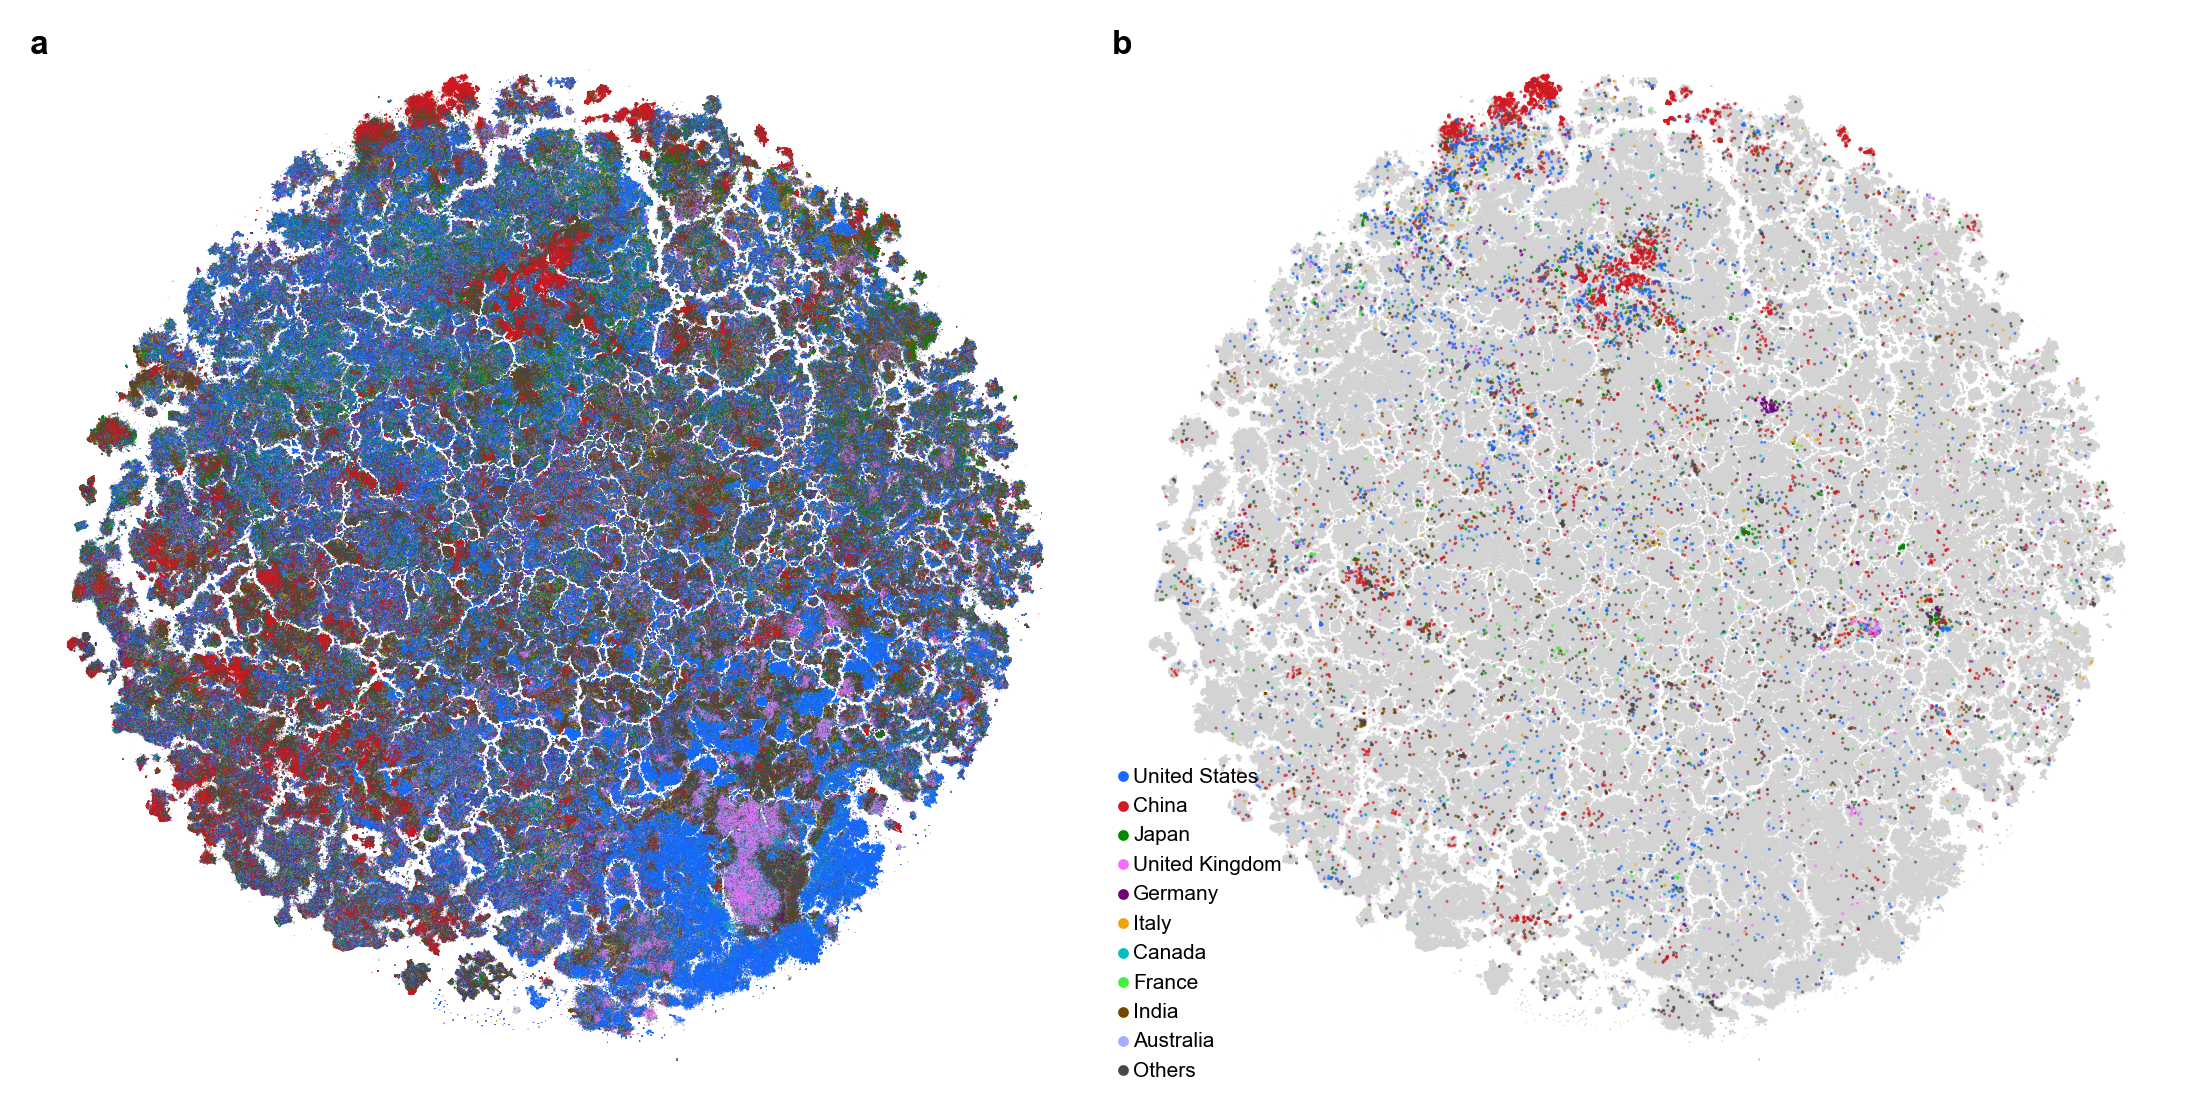

In [35]:
%matplotlib inline

fig, ax = plt.subplots(
    1, 2, figsize=(7.2, 3.6), dpi=300, sharey=True, layout="constrained"
)

txtkwargs = dict(size=8, weight="bold", va="top", ha="left")

x_lim = (-240, 240)
y_lim = (-240, 240)
tsne = tsne_bert

# subplot a
plot_tsne_colors(
    tsne,
    colors_countries_first_author_usa_corrected_with_black,
    x_lim=x_lim,
    y_lim=y_lim,
    ax=ax[0],
    plot_type="subplot_2",
)

all_keys = []
for key, value in colors_countries_legend_2024.items():
    key = ax[0].scatter([], [], c=value, s=10, alpha=1, label=key)
    all_keys.append(key)

key = ax[0].scatter([], [], c="#474747", s=10, alpha=1, label="Others")
all_keys.append(key)

ax[0].text(
    0, 1, string.ascii_lowercase[0], transform=ax[0].transAxes, **txtkwargs
)


# subplot b
s_grey = 0.5
alpha_grey = 0.02
s_color = 2
alpha_color = 0.7


subregion = tsne[mask_retracted_pmids][
    (~mask_retraction)
    & (~mask_retracted)
    & (~mask_withdrawal)
    & (~mask_withdrawn)
]

colors_subregion = colors_countries_first_author_usa_corrected_with_black[
    mask_retracted_pmids
][
    (~mask_retraction)
    & (~mask_retracted)
    & (~mask_withdrawal)
    & (~mask_withdrawn)
]

subregion_rw = tsne[mask_new_retracted_pmids][
    (~mask_retraction_new)
    & (~mask_retracted_new)
    & (~mask_withdrawal_new)
    & (~mask_withdrawn_new)
]
colors_subregion_rw = colors_countries_first_author_usa_corrected_with_black[
    mask_new_retracted_pmids
][
    (~mask_retraction_new)
    & (~mask_retracted_new)
    & (~mask_withdrawal_new)
    & (~mask_withdrawn_new)
]

ax[1].scatter(
    *tsne.T,
    c="lightgrey",
    s=s_grey,
    alpha=alpha_grey,
    marker=".",
    linewidths=0,
    rasterized=True,
    ec="None",
)

ax[1].scatter(
    *subregion.T,
    s=s_color,
    c=colors_subregion,
    alpha=alpha_color,
    marker=".",
    linewidths=0,
    rasterized=True,
)

ax[1].scatter(
    *subregion_rw.T,
    s=s_color,
    c=colors_subregion_rw,
    alpha=alpha_color,
    marker=".",
    linewidths=0,
    rasterized=True,
)

all_keys = []
for key, value in colors_countries_legend_2024.items():
    key = ax[1].scatter([], [], c=value, s=10, alpha=1, label=key)
    all_keys.append(key)

key = ax[1].scatter([], [], c="#474747", s=10, alpha=1, label="Others")
all_keys.append(key)

ax[1].legend(
    handles=all_keys,
    loc="lower left",
    fontsize=5,
    frameon=False,
    borderpad=0.2,
    handletextpad=0,
    handlelength=1,
    borderaxespad=-0.2,  
)  


ax[1].axis("equal")
ax[1].set_xlim(x_lim[0], x_lim[1])
ax[1].set_ylim(y_lim[0], y_lim[1])
ax[1].axis("off")
ax[1].text(
    0, 1, string.ascii_lowercase[1], transform=ax[1].transAxes, **txtkwargs
)


fig.savefig(
    figures_path / "fig_tsne_and_retracted_papers_by_country_v4.png", dpi=300
)
fig.savefig(
    figures_path / "fig_tsne_and_retracted_papers_by_country_v4.pdf", dpi=300
)